In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Đọc dữ liệu
df = pd.read_csv('../data/gym_members_exercise_tracking.csv')

In [65]:
# Xem 5 dòng đầu và thông tin tổng quan
print(df.head())
print(df.info())
print(df.isnull().sum())  # Kiểm tra giá trị thiếu

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [66]:
# Biến mục tiêu là Calories_Burned
y = df['Calories_Burned']

# Đặc trưng đầu vào: bỏ Calories_Burned và BMI (BMI phụ thuộc chiều cao, cân nặng)
X = df.drop(['Calories_Burned', 'BMI'], axis=1)


In [67]:
# So sánh lượng calories tiêu hao giữa các loại bài tập và giới tính (giống hình bạn gửi)
grouped = df.groupby(['Workout_Type', 'Gender'])['Calories_Burned'].mean().reset_index()
grouped['Calories_Burned'] = grouped['Calories_Burned'].round(2)

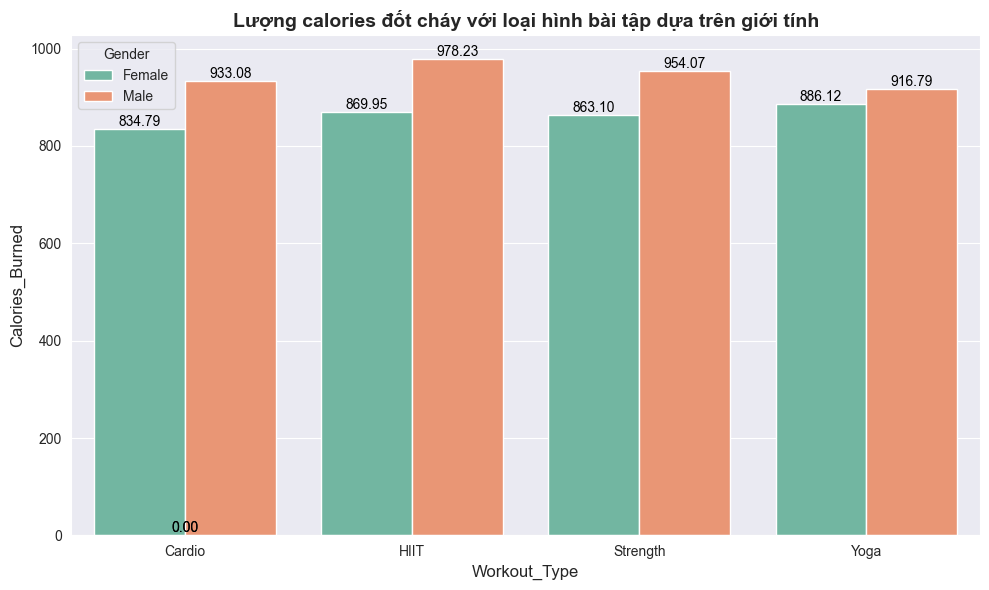

In [84]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=grouped,
    x='Workout_Type',
    y='Calories_Burned',
    hue='Gender',
    palette='Set2'
)
# Hiển thị giá trị trên đầu cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Lượng calories đốt cháy với loại hình bài tập dựa trên giới tính', fontsize=14, fontweight='bold')
plt.xlabel('Workout_Type', fontsize=12)
plt.ylabel('Calories_Burned', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [69]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
# Xác định các cột dạng số và dạng phân loại
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [71]:
# Tiền xử lý: chuẩn hóa số, mã hóa one-hot cho phân loại
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [72]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [73]:
# Training Linear Regression model
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [74]:
# Dự đoán
y_pred_lr = lg.predict(X_test)

In [75]:
# Đánh giá
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 32.777444141547164
RMSE: 43.85064613202374
R2: 0.9767054235234914


In [76]:
# Chọn k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [77]:
y_pred_knn = knn.predict(X_test)

In [78]:
# Đánh giá
print("KNN Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred_knn))

KNN Regression:
MAE: 88.86393442622952
RMSE: 110.67359630025938
R2: 0.8516147032051032


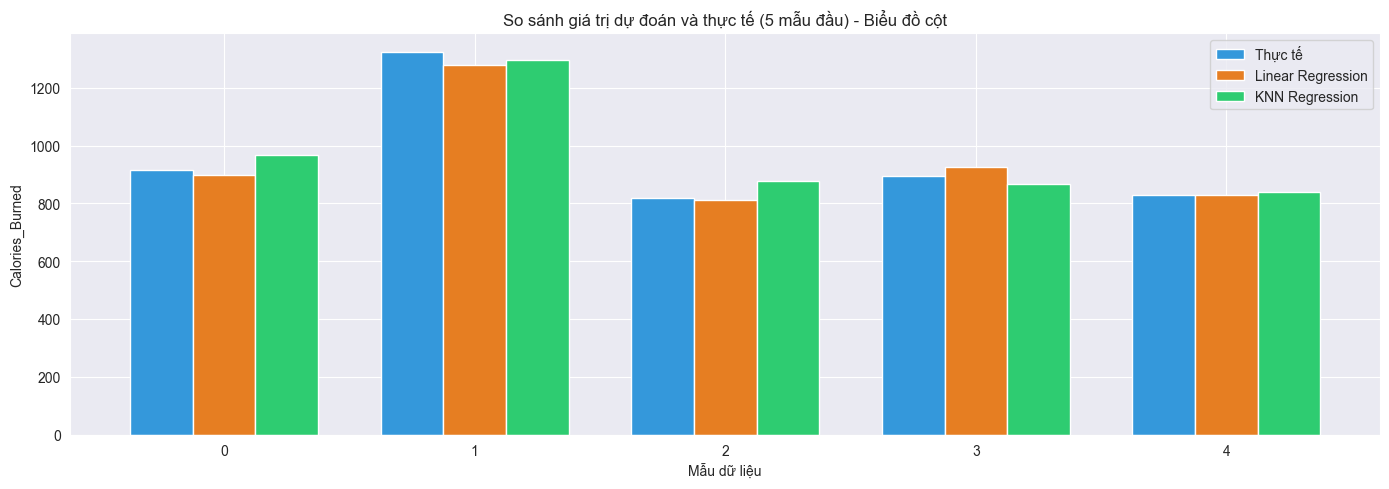

In [79]:
n = 5
indices = np.arange(n)
bar_width = 0.25

plt.figure(figsize=(14, 5))
plt.bar(indices - bar_width, y_test.values[:n], width=bar_width, label='Thực tế', color='#3498db')
plt.bar(indices, y_pred_lr[:n], width=bar_width, label='Linear Regression', color='#e67e22')
plt.bar(indices + bar_width, y_pred_knn[:n], width=bar_width, label='KNN Regression', color='#2ecc71')

plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Calories_Burned')
plt.title('So sánh giá trị dự đoán và thực tế (5 mẫu đầu) - Biểu đồ cột')
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
import pickle
with open('../models/linear.pkl', 'wb') as model_file:
    pickle.dump(lg, model_file)

In [81]:
with open('../models/knn.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

In [82]:
with open('../models/preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)